# Google Search Analysis with Seaborn

This project analyzes Google search trends for AI-related terms in Turkey over the past 5 years using Python and the pytrends library. It employs various data visualization techniques with Seaborn to explore patterns, correlations, and distributions in search volumes for terms like 'yapay zeka' (artificial intelligence), 'chatgpt', and 'gemini'. The analysis includes line plots, heatmaps, bar charts, and more advanced visualizations to provide comprehensive insights into the evolving interest in AI technologies.


Dataset: pytrends

Example Solution: https://thecleverprogrammer.com/2021/04/27/google-search-analysis-with-python/

Hugging Face: https://huggingface.co/spaces/alperugurcan/pytrends-visualization


In [109]:
import pandas as pd
import numpy as np
import seaborn as sns

from pytrends.request import TrendReq
trends = TrendReq()

In [102]:
ai_terms = ['yapay zeka', 'chatgpt', 'gemini']

trends.build_payload(kw_list=ai_terms, geo='TR', timeframe='today 5-y')

In [103]:
data = trends.interest_over_time()
data.drop(columns=['isPartial'], inplace=True)
data = data.reset_index()


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


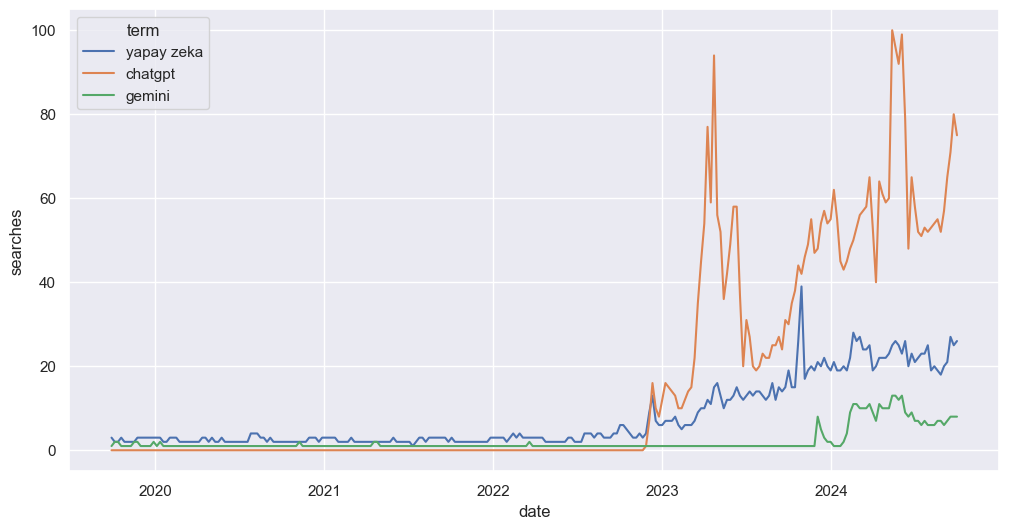

In [104]:
# 1. Line plot: All terms
sns.set(rc={'figure.figsize':(12,6)})
g = sns.lineplot(data=data.melt(id_vars=['date'], var_name='term', value_name='searches'),
                 x='date', y='searches', hue='term')

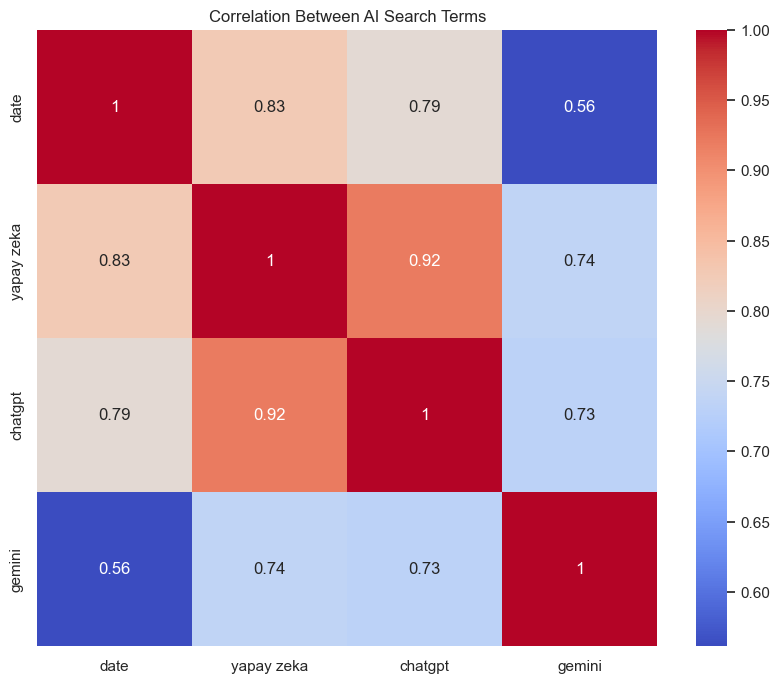

In [106]:
# 2. Heatmap: Correlation
sns.set(rc={'figure.figsize':(10,8)})
g = sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
g.set_title('Correlation Between AI Search Terms');

C:\Users\alperugurcan\AppData\Local\Temp\ipykernel_2380\191027564.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0, 0, 'yapay zeka'), Text(1, 0, 'chatgpt'), Text(2, 0, 'gemini')]

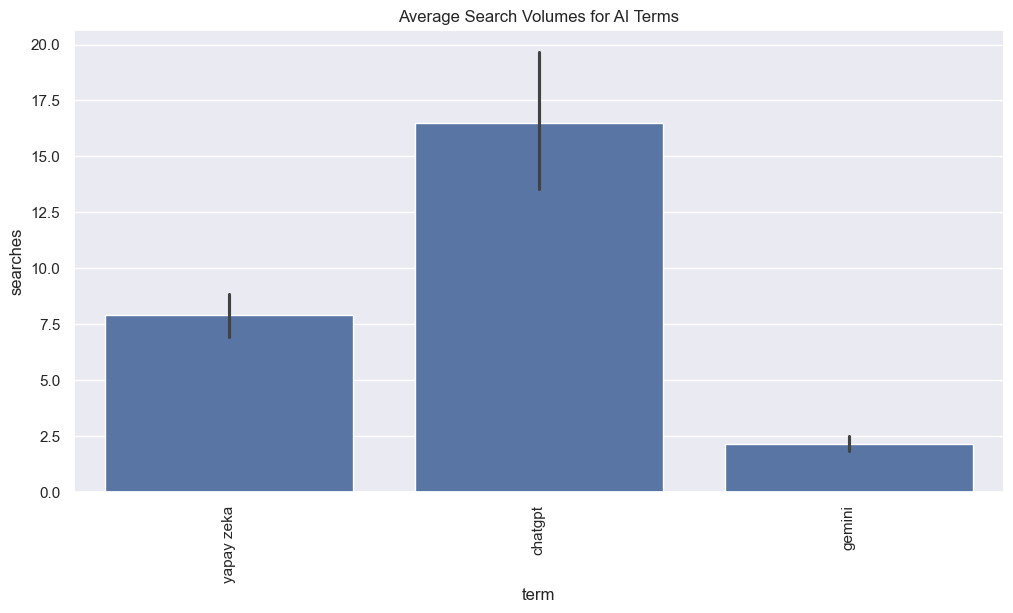

In [110]:
# 3. Bar plot: Average search volumes
g = sns.barplot(data=data.melt(id_vars=['date'], var_name='term', value_name='searches'),
                x='term', y='searches', estimator=np.mean)
g.set_title('Average Search Volumes for AI Terms')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

C:\Users\alperugurcan\AppData\Local\Temp\ipykernel_2380\1084336347.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  g = sns.lineplot(data=data.resample('Q', on='date').mean().reset_index(),
C:\Users\alperugurcan\AppData\Local\Temp\ipykernel_2380\1084336347.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


[Text(17897.0, 0, '2019'),
 Text(18262.0, 0, '2020'),
 Text(18628.0, 0, '2021'),
 Text(18993.0, 0, '2022'),
 Text(19358.0, 0, '2023'),
 Text(19723.0, 0, '2024')]

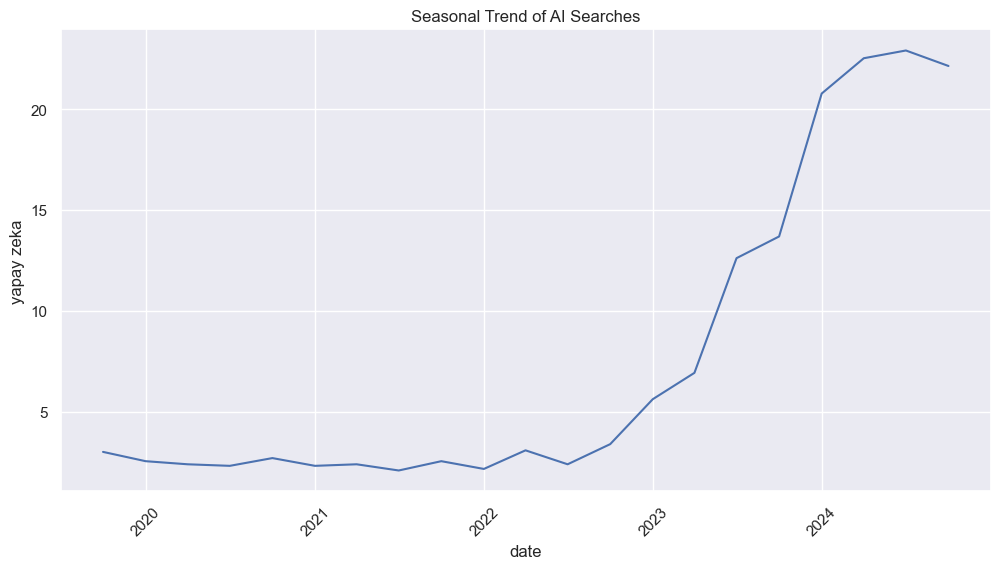

In [120]:
# 4. Line plot: Seasonal trend
g = sns.lineplot(data=data.resample('Q', on='date').mean().reset_index(),
                 x='date', y='yapay zeka')
g.set_title('Seasonal Trend of AI Searches')
g.set_xticklabels(g.get_xticklabels(), rotation=45)

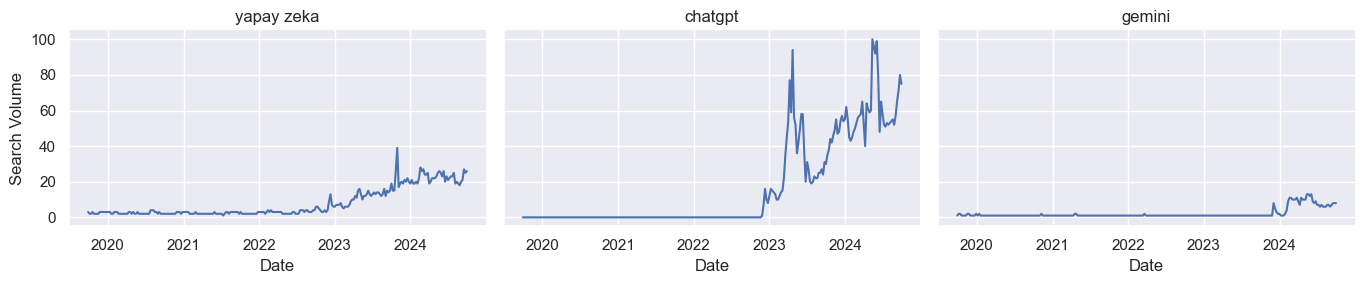

In [128]:
# 5. Facet grid: Individual graphs for all terms
g = sns.FacetGrid(data.melt(id_vars=['date'], var_name='term', value_name='searches'),
                  col="term", col_wrap=5, height=3, aspect=1.5)
g.map(sns.lineplot, "date", "searches")
g.set_axis_labels("Date", "Search Volume")
g.set_titles("{col_name}")

C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 38.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 45.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 67.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


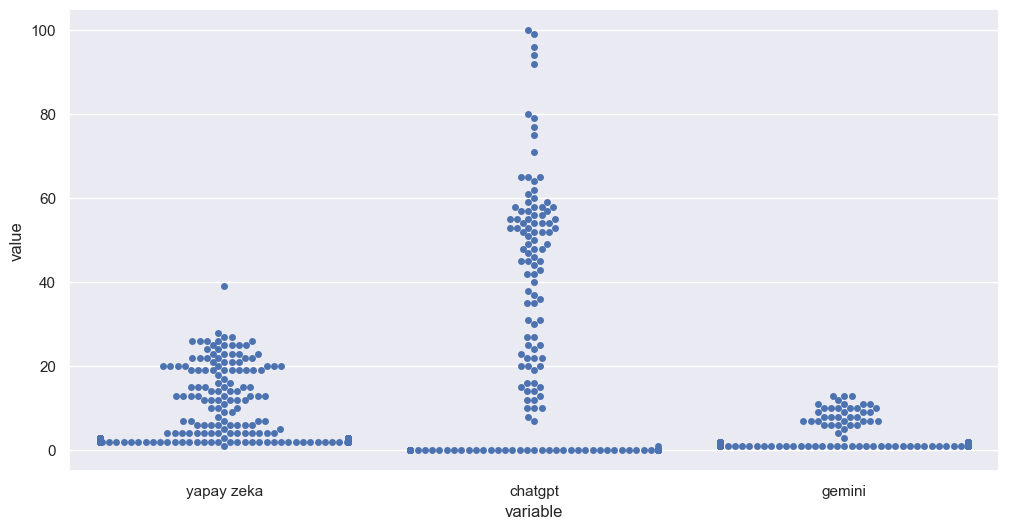

In [132]:
# 6. Swarm plot: Distribution of search volumes
sns.swarmplot(data=data.melt(id_vars='date'), x='variable', y='value');

<Axes: xlabel='variable', ylabel='value'>

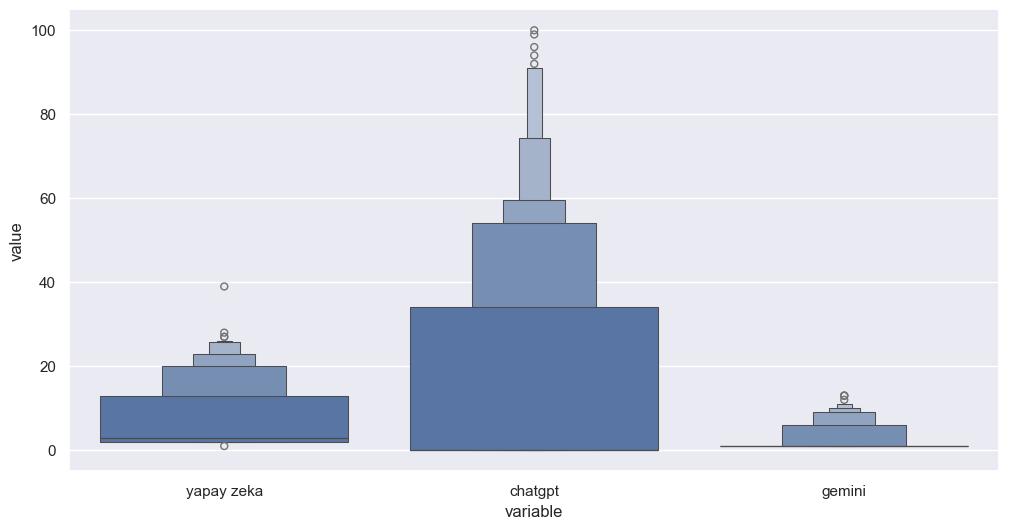

In [133]:
# 7. Boxen plot: Detailed distribution of search volumes
sns.boxenplot(data=data.melt(id_vars='date'), x='variable', y='value')


<Axes: xlabel='variable', ylabel='value'>

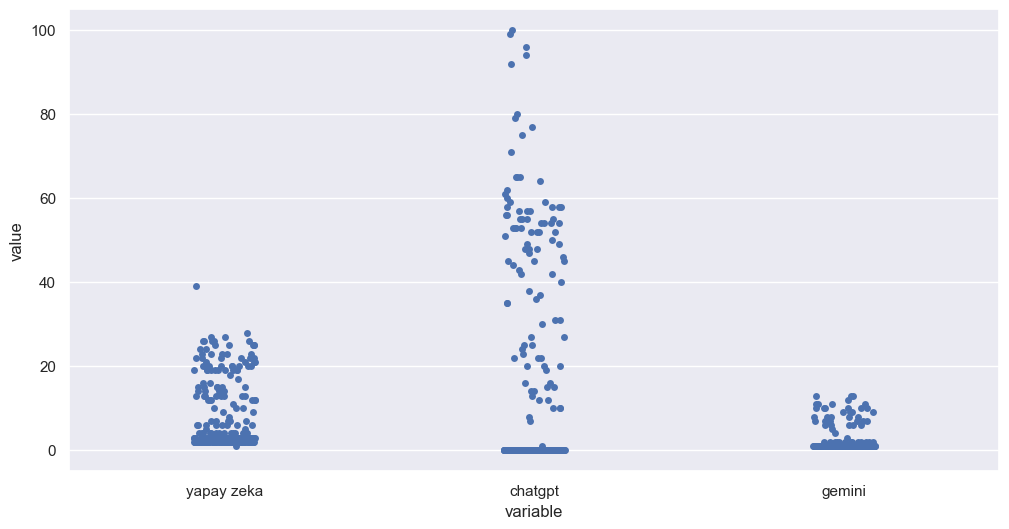

In [134]:
# 8. Categorical scatter plot
sns.stripplot(data=data.melt(id_vars='date'), x='variable', y='value', jitter=True)


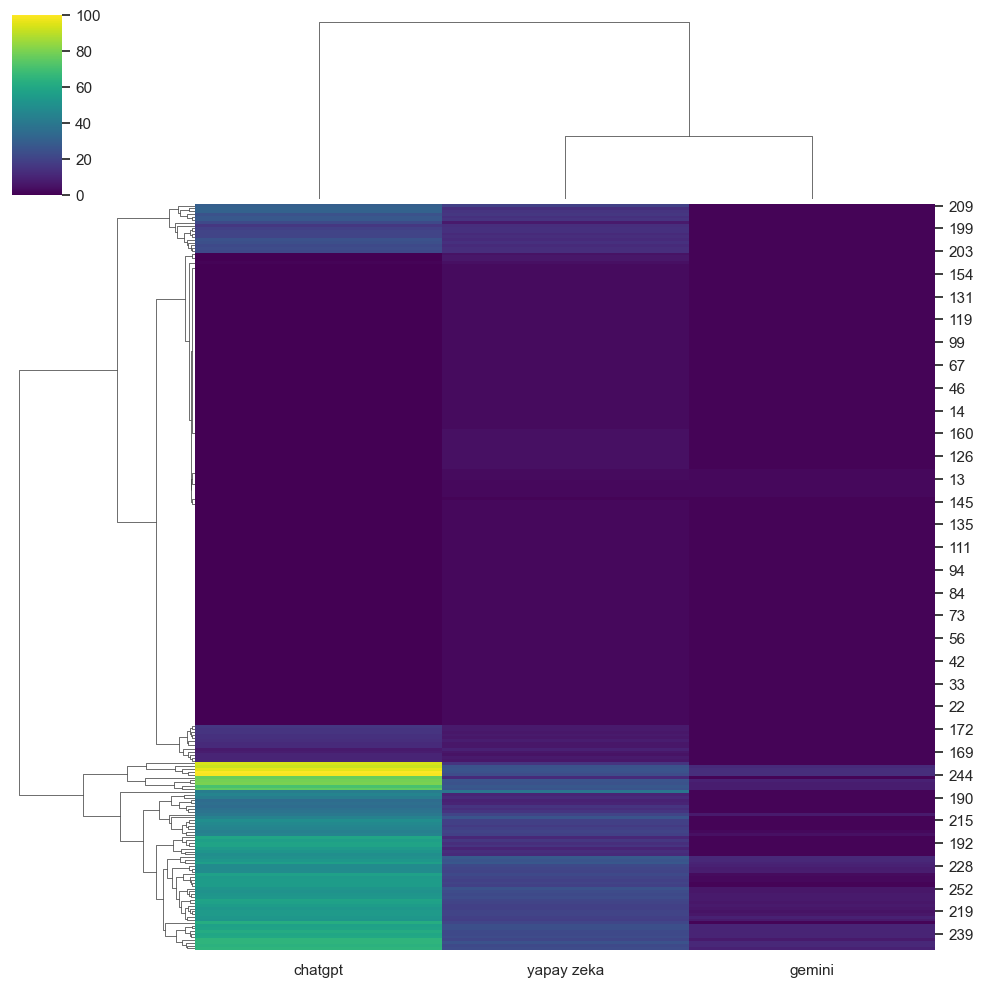

In [135]:
# 9. Clustermap: Hierarchical clustering heatmap
sns.clustermap(data[ai_terms], cmap='viridis', figsize=(10, 10))


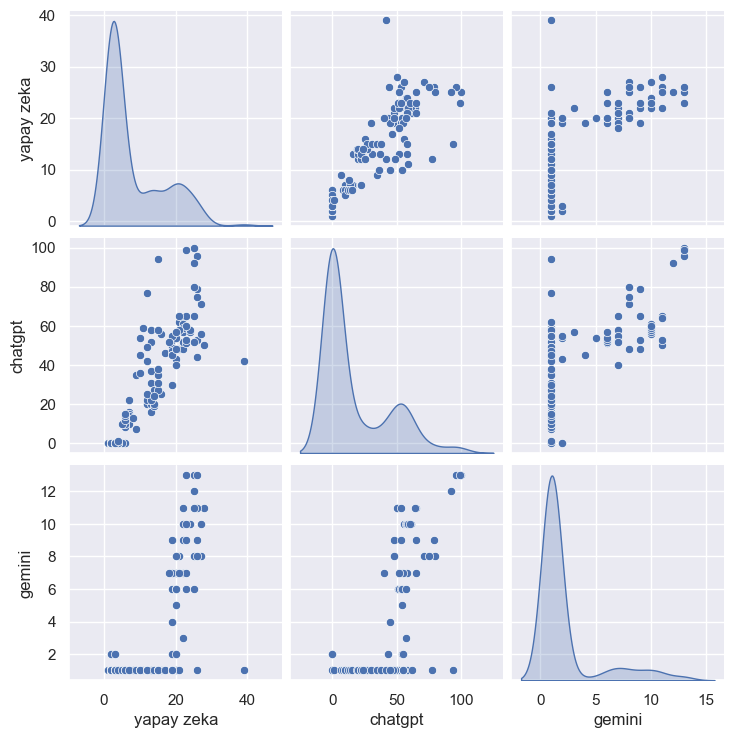

In [136]:
# 10. Pairplot: Scatter plot matrix with distributions
sns.pairplot(data[ai_terms], diag_kind='kde')
